### 데이터 불러오기 & 각 컬럼 데이터 확인, 결측치나 비논리적 정보 제외

In [1]:
import pandas as pd

### 1) 고객 정보

In [2]:
customer = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/ecommerce/olist_customers_dataset.csv')

In [3]:
duplicate_values = customer['customer_unique_id'].value_counts()[customer['customer_unique_id'].value_counts() > 1]
customer_repeat = pd.DataFrame(duplicate_values)
customer_repeat.shape

(2997, 1)

- #### 2997명의 고객이 2번 이상의 횟수로 구매

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


- #### 고객 정보 결측치 없음

### 2) 구매처 정보

In [5]:
seller = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/ecommerce/olist_sellers.csv')

In [6]:
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [7]:
seller.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [8]:
duplicate_values = seller['seller_id'].value_counts()[seller['seller_id'].value_counts() > 1]
seller_repeat = pd.DataFrame(duplicate_values)
seller_repeat.shape

(0, 1)

### 3) 지리 정보

In [9]:
geo = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/ecommerce/olist_geolocation.csv')

In [10]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [11]:
duplicate_values = geo['geolocation_zip_code_prefix'].value_counts()[geo['geolocation_zip_code_prefix'].value_counts() > 1]
zip_code_prefix = pd.DataFrame(duplicate_values)
zip_code_prefix.shape

(17972, 1)

In [12]:
geo['geolocation_zip_code_prefix'].nunique()

19015

- #### geo 데이터셋에서 zip_code_prefix 중복되는 데이터 17972개임
- #### geo 데이터셋에서 zip_code_prefix에서 unique 데이터는 19015개임

#### 중복된 행 제거, unique 값만 남기기

In [13]:
geo = geo.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')

In [14]:
geo.shape

(19015, 5)

## <고객 정보 & 지리정보 결합 / 판매처 정보 & 지리정보 결합>

In [15]:
customer_geo = pd.merge(customer, geo, how='left', left_on ='customer_zip_code_prefix', right_on ='geolocation_zip_code_prefix')

In [16]:
customer_geo.sample(n=10, random_state=42)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
52263,c7432c6d237ffd6aa36a007b4237ec38,9a897ea48bf988012c00b802f1104a92,2971,sao paulo,SP,2971.0,-23.484810,-46.710731,são paulo,SP
46645,7f399d641e2e2064470145178c9e8778,90436a67885a57f147fb79e6d0e4bc1c,38610,unai,MG,38610.0,-16.362606,-46.892796,unai,MG
37546,ba5642b730704dc0f74b7cf715b41ed5,4d8056f71519ae1069e6747c63c676f7,88820,icara,SC,88820.0,-28.762992,-49.274992,içara,SC
94756,0f346a2cc84ebb2d52f0759d0acfd030,6117c9ef3251089693a6abb90c195eba,25250,duque de caxias,RJ,25250.0,-22.577232,-43.305238,duque de caxias,RJ
14771,d393b9491df482cf448e60aa9955b7f2,5caf3a2a5d1ef808e3dd182e79baa392,36955,mutum,MG,36955.0,-19.818188,-41.443460,mutum,MG
36263,d9b4a26e122e830decf445a401ff0506,99062accc4c9bbd3a766f5af8beea25a,79005,campo grande,MS,79005.0,-20.480731,-54.617642,campo grande,MS
98556,3d7ded9f88ad6b06bc3f16ef0987fc54,c7d1c1a9792b4c5b53f6e88807ec88f6,13202,jundiai,SP,13202.0,-23.207180,-46.876930,jundiai,SP
23747,beabad0a90f659fbd73b571183bab1ec,c9e70f489d81d99aa85136bae90b4427,9971,diadema,SP,9971.0,-23.723068,-46.632000,diadema,SP
50315,c0a599a259226219c1ea0d3b8821ca54,2e1b1231ac9b6f371971b8ec7b9d0fcd,4215,sao paulo,SP,4215.0,-23.595734,-46.598395,são paulo,SP
6501,6a8f01843537891ff93700664ca11c7b,39d26db6530f0ad21b671a973cb6e03f,68741,castanhal,PA,68741.0,-1.299945,-47.942052,castanhal,PA


In [17]:
customer_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  99441 non-null  object 
 1   customer_unique_id           99441 non-null  object 
 2   customer_zip_code_prefix     99441 non-null  int64  
 3   customer_city                99441 non-null  object 
 4   customer_state               99441 non-null  object 
 5   geolocation_zip_code_prefix  99163 non-null  float64
 6   geolocation_lat              99163 non-null  float64
 7   geolocation_lng              99163 non-null  float64
 8   geolocation_city             99163 non-null  object 
 9   geolocation_state            99163 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


- #### unique값만 있는 지리정보를 추출해서 customer zip code를 기준으로 merge 하였지만 geo zip code에 결측치 있음.
- #### 즉, customer 데이터셋의 지리정보가 더 많고 geo 데이터셋에 없는 지리정보가 있음

In [18]:
# Null 값이 있는 행 출력
null_rows = customer_geo[customer_geo['geolocation_zip_code_prefix'].isnull()]

In [19]:
null_rows.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
354,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF,NaN,NaN,NaN,NaN,NaN
382,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP,NaN,NaN,NaN,NaN,NaN
877,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI,NaN,NaN,NaN,NaN,NaN
1218,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF,NaN,NaN,NaN,NaN,NaN
1272,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP,NaN,NaN,NaN,NaN,NaN


In [20]:
customer_geo[customer_geo['geolocation_zip_code_prefix'] == 72300.0]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [21]:
seller_geo = pd.merge(seller, geo, how='left', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')

In [22]:
seller_geo.sample(n=10, random_state=40)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
260,ac1ed5fc15901fbc92920361eb4ab350,3334,sao paulo,SP,3334.0,-23.554597,-46.573704,sao paulo,SP
355,5bffbafbb22daf6d3bfc216a46db8708,26525,nilopolis,RJ,26525.0,-22.800936,-43.424861,nilopolis,RJ
2524,dace965ca58120f92f8d742a9fa1864b,14015,sao paulo,SP,14015.0,-21.180024,-47.813864,ribeirao preto,SP
731,9674754b5a0cb32b638cec001178f799,4438,sao paulo,SP,4438.0,-23.677741,-46.668647,sao paulo,SP
2862,bf961104a38e01b9062ee026bb657dee,14055,ribeirao preto,SP,14055.0,-21.157578,-47.817436,ribeirao preto,SP
1984,5d3bb11474a06bdc23fb9e89f1164ee0,19804,assis,SP,19804.0,-22.662722,-50.437765,assis,SP
304,92c8bc6e8f925792247656fed09aad65,3384,sao paulo,SP,3384.0,-23.578843,-46.522802,sao paulo,SP
1883,4d8809767a5bafe22909c77951fb6b41,6803,embu das artes,SP,6803.0,-23.646983,-46.845705,embu das artes,SP
283,7142540dd4c91e2237acb7e911c4eba2,16301,penapolis,SP,16301.0,-21.426570,-50.067918,penapolis,SP
2483,6e2d3e2dc84fb30f6078f39dd3bddd6f,83408,colombo,PR,83408.0,-25.371299,-49.188234,colombo,PR


In [23]:
seller_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   seller_id                    3095 non-null   object 
 1   seller_zip_code_prefix       3095 non-null   int64  
 2   seller_city                  3095 non-null   object 
 3   seller_state                 3095 non-null   object 
 4   geolocation_zip_code_prefix  3088 non-null   float64
 5   geolocation_lat              3088 non-null   float64
 6   geolocation_lng              3088 non-null   float64
 7   geolocation_city             3088 non-null   object 
 8   geolocation_state            3088 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 217.7+ KB


### 4) 주문 아이템 (order_item) 데이터셋 확인

In [24]:
oi = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/ecommerce/olist_order_items.csv')

In [25]:
oi.shape

(112650, 7)

In [26]:
oi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [27]:
# order item 데이터셋에서 고유한 order_id가 몇개 있는지 알아본다.

unique_id_count = oi['order_id'].nunique()
unique_id_count

98666

- #### 반복되는 order_id 예시 '00143d0f86d6fbd9f9b38ab440ac16f5' 

In [28]:
oi[oi['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


- #### 중복된 order_id만 리스트로 추출

In [29]:
duplicate_id_list = oi['order_id'][oi['order_id'].duplicated()].unique()
len(duplicate_id_list)

9803

- #### 아이템을 여러개 구입한 주문 id에서 seller가 다 동일한지 확인 --> 모두 동일

In [30]:
duplicate_id_list[:3]

array(['0008288aa423d2a3f00fcb17cd7d8719',
       '00143d0f86d6fbd9f9b38ab440ac16f5',
       '001ab0a7578dd66cd4b0a71f5b6e1e41'], dtype=object)

In [31]:
oi[oi['order_id'] == '0008288aa423d2a3f00fcb17cd7d8719']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37


- #### 아이템을 중복구매한 경우 몇개까지 중복 구매하였는지 개수 분포를 살펴봄

In [32]:
import matplotlib.pyplot as plt

In [33]:
filter = oi[oi['order_id'].isin(duplicate_id_list)]
filter.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10


In [34]:
filtered = filter.groupby('order_id')['order_item_id'].max()
new_filter = filtered.reset_index()

In [35]:
new_filter.head(3)

,order_id,order_item_id
0,0008288aa423d2a3f00fcb17cd7d8719,2
1,00143d0f86d6fbd9f9b38ab440ac16f5,3
2,001ab0a7578dd66cd4b0a71f5b6e1e41,3


(array([7.516e+03, 0.000e+00, 1.322e+03, 0.000e+00, 0.000e+00, 5.050e+02,
        0.000e+00, 2.040e+02, 0.000e+00, 0.000e+00, 1.980e+02, 0.000e+00,
        0.000e+00, 2.200e+01, 0.000e+00, 8.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 8.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 2.  ,  2.38,  2.76,  3.14,  3.52,  3.9 ,  4.28,  4.66,  5.04,
         5.42,  5.8 ,  6.18,  6.56,  6.94,  7.32,  7.7 ,  8.08,  8.46,
         8.84,  9.22,  9.6 ,  9.98, 10.36, 10.74, 11.12, 11.5 , 11.88,
        12.26, 12.64, 13.02, 13.4 , 13.78, 14.16, 14.54, 14.92, 15.3 ,
        15.68, 16.06, 16.44, 16.82, 17.2 , 17.58, 17.96, 18.34, 18.72,
        19.1 , 19.48,

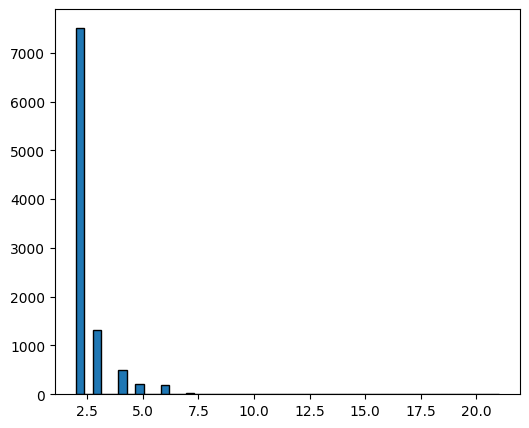

In [36]:
plt.figure(figsize=(6, 5))
plt.hist(new_filter['order_item_id'], bins=50, edgecolor='black')

In [37]:
print(max(new_filter['order_item_id']))
print(min(new_filter['order_item_id']))

21
2


- #### 중복구매 최대 개수는 21개, 최소개수는 2개

### 중복된 'order_id' 그룹에서 'order_item_id(아이템 개수)'가 가장 높은 행만 남기기


In [38]:
result = oi.loc[oi.groupby('order_id')['order_item_id'].idxmax()]
oi_max = result
oi_max.shape

(98666, 7)

- #### order_item 결측치 없음
  - unique한 order_id 개수는 98666개
  - 반복되는 order_id 개수는 9803개. unique한 order_id 중 9803개가 반복됨. 이 **order_id**는 특정상품을 두번이상 구매
  - **order_item_id**는 order_id에 따른 구매한 아이템 개수를 나타냄 (1개~21개)

- ### order_item_id를 상품 개수를 뜻하는 컬럼명을 바꾸기

In [41]:
oi_max = oi_max.rename(columns={'order_item_id': 'item_count'}, inplace=False)

- ### 전체 상품 구매액을 나타내는 새로운 컬럼(지표), 'total_cost' 만들기

In [42]:
oi_max['total_cost'] = oi_max['item_count']*oi_max['price']

In [52]:
oi_max.to_csv("order_item_max.csv")

### 5) 결제수단 (payment) 방식 데이터셋 확인

In [43]:
payment = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/ecommerce/olist_order_payments.csv')

In [44]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [45]:
payment.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [46]:
payment['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

### 6) 상품 (products) 데이터셋 확인

In [47]:
products = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/ecommerce/olist_products.csv')

In [48]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [49]:
products.sample(n=10, random_state=22)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6168,e3217b2b6ec69befdfa1e98962b2565d,brinquedos,57.0,882.0,4.0,350.0,20.0,25.0,20.0
13934,e087cb77e9a24e317f4ba08077fa6226,moveis_decoracao,60.0,2010.0,2.0,1450.0,69.0,11.0,11.0
11917,23bb156d1ade824158d1b0c799f9a641,cool_stuff,46.0,978.0,5.0,1000.0,50.0,20.0,20.0
350,a2bd2eae20998a24c22b110334928b02,malas_acessorios,39.0,278.0,1.0,700.0,19.0,48.0,35.0
21149,2373f6870eb01db83a3609a731580320,informatica_acessorios,56.0,1026.0,1.0,300.0,16.0,10.0,12.0
30515,2b7bb91ceee2bfa598986638fb136ba4,alimentos_bebidas,59.0,399.0,2.0,262.0,28.0,15.0,20.0
32527,7a644354b3b217b7d89e529bb01f334e,perfumaria,55.0,215.0,1.0,100.0,17.0,9.0,20.0
31342,3d9bbe6e6d8c6dd8ba6e728f2586e510,beleza_saude,60.0,499.0,1.0,273.0,16.0,13.0,14.0
2756,09b2a4f1ce3561a6562ffdccc0ca7c18,ferramentas_jardim,47.0,508.0,3.0,1150.0,25.0,20.0,25.0
8792,f88585b513695493f26dbffb34c01e75,moveis_decoracao,60.0,149.0,1.0,500.0,30.0,16.0,26.0


In [50]:
unique_product_id_count = products['product_id'].nunique()
unique_product_id_count

32951

### order_items_max와 products 데이터셋 결함 --> order_item_product

In [62]:
order_item_product = pd.merge(oi_max, products, how='left', on='product_id')

In [64]:
order_item_product.shape

(98666, 15)

In [22]:
orders = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/ecommerce/olist_orders.csv')

In [23]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [24]:
orders[orders['order_status'] == 'created']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00


In [25]:
orders[orders['order_status'] == 'unavailable']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00
...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaN,NaN,2017-10-27 00:00:00
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaN,NaN,2018-01-19 00:00:00
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [44]:
unique_order_id_count = orders['order_id'].nunique()
unique_order_id_count

99441

In [70]:
order_item_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    98666 non-null  object 
 1   order_item_id               98666 non-null  int64  
 2   product_id                  98666 non-null  object 
 3   seller_id                   98666 non-null  object 
 4   shipping_limit_date         98666 non-null  object 
 5   price                       98666 non-null  float64
 6   freight_value               98666 non-null  float64
 7   product_category_name       97248 non-null  object 
 8   product_name_lenght         97248 non-null  float64
 9   product_description_lenght  97248 non-null  float64
 10  product_photos_qty          97248 non-null  float64
 11  product_weight_g            98650 non-null  float64
 12  product_length_cm           98650 non-null  float64
 13  product_height_cm           986

- #### customer_geo
- #### seller_geo

#### product 정보 - order_items를 기준으로 product join = order_item_product
#### orders의 unique order_id가 order_items의 unique order_id 보다 많음. 
- ### 따라서 order_item_product의 주문정보(id)가 더 적음. 따라서 **적은** order_item_product 기준으로 orders를 join.

(orders 데이터셋 정보: 주문상태 / 리뷰, 결제방식
그 다음, customer_geo 데이터에 orders 데이터를 합친다. 

In [113]:
item_status_product = pd.merge(order_item_product, orders, how='left', on='order_id')

In [114]:
item_status_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98666 non-null  object 
 1   order_item_id                  98666 non-null  int64  
 2   product_id                     98666 non-null  object 
 3   seller_id                      98666 non-null  object 
 4   shipping_limit_date            98666 non-null  object 
 5   price                          98666 non-null  float64
 6   freight_value                  98666 non-null  float64
 7   product_category_name          97248 non-null  object 
 8   product_name_lenght            97248 non-null  float64
 9   product_description_lenght     97248 non-null  float64
 10  product_photos_qty             97248 non-null  float64
 11  product_weight_g               98650 non-null  float64
 12  product_length_cm              98650 non-null 

In [115]:
item_status_product.sample(n=10, random_state=22)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
45721,76d02bba227a9b675d413ce36b7231c6,1,4deaa173012071863baaf9702b34168c,e9779976487b77c6d4ac45f75ec7afe9,2017-09-21 16:35:16,87.00,15.36,bebidas,60.0,1740.0,...,20.0,15.0,15.0,753c62e8a94b6f213074e9a8999e6922,delivered,2017-09-16 16:24:07,2017-09-16 16:35:16,2017-09-19 19:58:11,2017-09-27 16:14:30,2017-10-04 00:00:00
53851,8c4f09ed660488431555a3738650d897,1,7ce94ab189134e2d3c05f496d635419c,8b321bb669392f5163d04c59e235e066,2018-05-17 10:17:43,13.65,15.23,eletronicos,39.0,400.0,...,25.0,7.0,16.0,6f63c8fb2fec92e5e4f3addb737d10b1,delivered,2018-05-11 10:04:25,2018-05-11 10:17:43,2018-05-11 13:56:00,2018-05-28 20:21:03,2018-06-14 00:00:00
14840,26ba0c1bad97bbfdcc4419e3ca40d9a8,1,a760ef0bb70c954d79e62ec6023d380c,01cf7e3d21494c41fb86034f2e714fa1,2017-02-04 20:17:34,76.05,15.79,cool_stuff,32.0,1115.0,...,24.0,23.0,25.0,0b0021fc48717a02bcbd22404ed2f1f3,delivered,2017-01-31 20:17:34,2017-01-31 20:35:55,2017-02-02 10:18:59,2017-02-07 08:33:38,2017-02-27 00:00:00
7589,13b194db506615d16a862e66b0a2f6e6,1,3e5201fe0d1ba474d9b90152c83c706c,8160255418d5aaa7dbdc9f4c64ebda44,2018-07-20 17:25:12,125.90,23.68,cama_mesa_banho,56.0,255.0,...,30.0,5.0,30.0,8cc6453c57a83e84ab84f67dac770a1c,delivered,2018-07-18 17:11:10,2018-07-18 17:25:12,2018-07-19 15:57:00,2018-07-24 15:32:09,2018-08-13 00:00:00
55653,912806f58b85a8b3b9a57757227c9a36,1,d435c3fa55cfd37fa04032168ed59cf8,51ed72984a04e5dd35c2b27e77179038,2017-12-27 16:52:30,223.90,35.00,eletrodomesticos_2,53.0,704.0,...,80.0,15.0,58.0,d76831a8621f75ed2c625ebf14d32f4a,delivered,2017-12-20 16:44:00,2017-12-20 16:52:30,2017-12-22 23:05:57,2018-02-01 14:15:31,2018-01-23 00:00:00
95816,f8a9c0be5071e2ca36f561ad567b1800,1,6b966b123b31a54f73d652b5d8f45bb3,8b181ee5518df84f18f4e1a43fe07923,2018-06-05 09:31:39,27.90,27.08,beleza_saude,59.0,846.0,...,28.0,40.0,25.0,40e141d432fb1a06f862197c9c0de0ce,delivered,2018-05-30 09:21:06,2018-05-30 09:34:56,2018-06-05 12:19:00,2018-06-13 22:48:47,2018-07-05 00:00:00
69708,b5339ee686743c519402f862fba76aee,1,57c580a8fbf3d8374b06bee7b6f4ce31,30a2f535bb48308f991d0b9ad4a8c4bb,2017-12-06 02:25:28,49.90,9.34,moveis_decoracao,57.0,780.0,...,50.0,3.0,25.0,ea50d78b023d96a5d45a86d2059348e1,delivered,2017-11-29 01:13:28,2017-11-30 02:25:28,2017-11-30 18:02:45,2017-12-01 23:07:04,2017-12-13 00:00:00
72902,bd4b5585c4d7c16db3fe69d062fcafb0,1,623fb8cc5f36842aa32650e2208a08c8,f8db351d8c4c4c22c6835c19a46f01b0,2017-02-07 13:32:11,24.90,24.84,relogios_presentes,58.0,361.0,...,18.0,8.0,13.0,180c7a296ff543e42cdb420d915588c7,delivered,2017-02-03 13:32:11,2017-02-03 13:45:08,2017-02-06 12:03:51,2017-02-21 16:56:00,2017-03-14 00:00:00
69830,b5781a5976dad5a78067d528713ef47e,1,b83ba81552d0748b45288e7e57c62888,edb1ef5e36e0c8cd84eb3c9b003e486d,2017-10-26 15:49:35,599.65,20.64,beleza_saude,41.0,874.0,...,36.0,10.0,16.0,daa2305279978c8d98ad9b317c9a9965,delivered,2017-10-21 15:40:00,2017-10-21 15:49:35,2017-10-23 20:04:06,2017-10-31 20:22:04,2017-11-17 00:00:00
10379,1ade84aca2a23a5b07101e2c8db4f120,2,97017430754804328eb9597b7f85da03,ea8482cd71df3c1969d7b9473ff13abc,2017-12-05 11:38:04,27.99,34.15,telefonia,60.0,818.0,...,17.0,4.0,12.0,6de415323c0f244a419ad9485ae825ec,delivered,2017-11-29 11:26:28,2017-11-29 11:38:04,2017-12-04 20:28:47,2017-12-18 17:53:47,2018-01-02 00:00:00


- ### order_status_product 와 customer_geo 합치기

In [116]:
item_status_product_customer = pd.merge(item_status_product, customer_geo, how='left', on='customer_id')

In [117]:
item_status_product_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98666 non-null  object 
 1   order_item_id                  98666 non-null  int64  
 2   product_id                     98666 non-null  object 
 3   seller_id                      98666 non-null  object 
 4   shipping_limit_date            98666 non-null  object 
 5   price                          98666 non-null  float64
 6   freight_value                  98666 non-null  float64
 7   product_category_name          97248 non-null  object 
 8   product_name_lenght            97248 non-null  float64
 9   product_description_lenght     97248 non-null  float64
 10  product_photos_qty             97248 non-null  float64
 11  product_weight_g               98650 non-null  float64
 12  product_length_cm              98650 non-null 

In [118]:
product_name = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/ecommerce/product_category_name_translation.csv')

- ### 마지막으로 프로덕트 카테고리 이름을 영어로 보기 위해 product name join
  - #### 병합된 데이터에서 unique한 상품 카테고리명은 73개 
  - #### 프로덕트 카테고리 영어로 해석가능한 상품은 총 71개

In [121]:
item_status_product_customer['product_category_name'].nunique()

73

In [122]:
product_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [123]:
eng_item_status_product_customer = pd.merge(item_status_product_customer, product_name, how='left', on='product_category_name')

In [124]:
eng_item_status_product_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98666 non-null  object 
 1   order_item_id                  98666 non-null  int64  
 2   product_id                     98666 non-null  object 
 3   seller_id                      98666 non-null  object 
 4   shipping_limit_date            98666 non-null  object 
 5   price                          98666 non-null  float64
 6   freight_value                  98666 non-null  float64
 7   product_category_name          97248 non-null  object 
 8   product_name_lenght            97248 non-null  float64
 9   product_description_lenght     97248 non-null  float64
 10  product_photos_qty             97248 non-null  float64
 11  product_weight_g               98650 non-null  float64
 12  product_length_cm              98650 non-null 

In [125]:
eng_item_status_product_customer.to_excel('eng_item_status_product_customer.xlsx', index=False)

In [137]:
eng_item_status_product_customer.to_csv('eng_item_status_product_customer.csv', index=False)

- ### Tableau에서 분석할 대상만 전체 데이터에서 추출하기

In [41]:
orig = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/ecommerce/eng_item_status_product_customer.csv')

In [16]:
pd.set_option('display.max_columns', None)

- ### 컬럼명 알기 쉽게 변환

In [42]:
orig_mod = orig.rename(columns={'order_item_id': 'item_count'}, inplace=False)

In [43]:
orig_mod.head(3)

,order_id,item_count,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,15775.0,-20.212393,-50.941471,santa fe do sul,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,35661.0,-19.860439,-44.597972,pará de minas,MG,furniture_decor


In [44]:
orig_mod[orig_mod['order_status'] == 'created']

,order_id,item_count,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english


In [45]:
orig_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98666 non-null  object 
 1   item_count                     98666 non-null  int64  
 2   product_id                     98666 non-null  object 
 3   seller_id                      98666 non-null  object 
 4   shipping_limit_date            98666 non-null  object 
 5   price                          98666 non-null  float64
 6   freight_value                  98666 non-null  float64
 7   product_category_name          97248 non-null  object 
 8   product_name_lenght            97248 non-null  float64
 9   product_description_lenght     97248 non-null  float64
 10  product_photos_qty             97248 non-null  float64
 11  product_weight_g               98650 non-null  float64
 12  product_length_cm              98650 non-null 

In [46]:
new_df = orig_mod.iloc[:, [0, 1, 2, 3, 5, 7, 31, 15, 16, 18, 22, 26, 27, 28, 29, 30]]

In [47]:
new_df_cleaned = new_df.dropna()

In [48]:
sales_cleaned = new_df_cleaned

In [49]:
sales_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96945 entries, 0 to 98665
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96945 non-null  object 
 1   item_count                     96945 non-null  int64  
 2   product_id                     96945 non-null  object 
 3   seller_id                      96945 non-null  object 
 4   price                          96945 non-null  float64
 5   product_category_name          96945 non-null  object 
 6   product_category_name_english  96945 non-null  object 
 7   customer_id                    96945 non-null  object 
 8   order_status                   96945 non-null  object 
 9   order_approved_at              96945 non-null  object 
 10  customer_unique_id             96945 non-null  object 
 11  geolocation_zip_code_prefix    96945 non-null  float64
 12  geolocation_lat                96945 non-null  floa

- #### order_status 중 아래 4가지는 완전히 종료되지 않았으므로 제외
1) processing
2) unavailable
3) canceled
4) created 


In [50]:
sales_cleaned = sales_cleaned[~sales_cleaned['order_status'].isin(['processing', 'unavailable', 'canceled', 'created'])]

In [51]:
sales_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96208 entries, 0 to 98665
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96208 non-null  object 
 1   item_count                     96208 non-null  int64  
 2   product_id                     96208 non-null  object 
 3   seller_id                      96208 non-null  object 
 4   price                          96208 non-null  float64
 5   product_category_name          96208 non-null  object 
 6   product_category_name_english  96208 non-null  object 
 7   customer_id                    96208 non-null  object 
 8   order_status                   96208 non-null  object 
 9   order_approved_at              96208 non-null  object 
 10  customer_unique_id             96208 non-null  object 
 11  geolocation_zip_code_prefix    96208 non-null  float64
 12  geolocation_lat                96208 non-null  floa

In [52]:
sales_cleaned.to_excel('sales_cleaned.xlsx', index=False)